Classification of garments using Fashion MNIST dataset

In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import gzip
import numpy as np
import tensorflow as tf
import numpy as np
fashion_mnist= tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()


filePath_train_set = '/content/drive/MyDrive/data/train-images-idx3-ubyte.gz'
filePath_train_label = '/content/drive/MyDrive/data/train-labels-idx1-ubyte.gz'

filePath_test_set = '/content/drive/MyDrive/data/t10k-images-idx3-ubyte.gz'
filePath_test_label = '/content/drive/MyDrive/data/t10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

print(type(testLabel))

print(trainSet.shape)

print(trainLabel.shape)

print(testSet.shape)

print(testLabel.shape)

4422102/4422102 [==============================] - 0s 0us/step
<class 'numpy.ndarray'>
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [4]:
X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [5]:
class_names= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

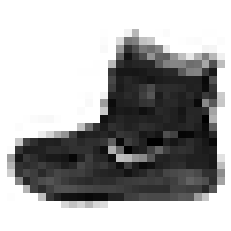

In [6]:
def showImage(data):
    some_article = data
    some_article_image = some_article.reshape(28, 28)
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()
    
showImage(X_train[0])

In [7]:
y_train[0]

9

In [8]:
import numpy as np
np.random.seed(42)   
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

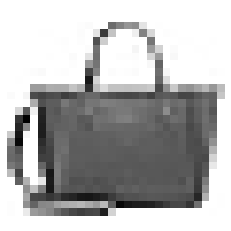

In [9]:
showImage(X_train[0])

In [10]:
data={}
li=[]

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42) 
sgd_clf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(random_state=42)

In [14]:
y_train_predict = sgd_clf.predict(X_train[0].reshape(1, -1))

In [15]:
y_train[0]

8

In [16]:
y_train_predict[0]

8

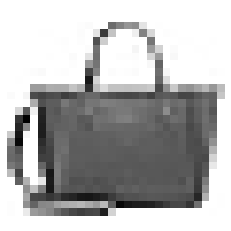

In [17]:
showImage(X_train[0])

In [18]:
y_train_predict = sgd_clf.predict(X_train_scaled)

In [19]:
sgd_accuracy = accuracy_score(y_train, y_train_predict)
sgd_precision = precision_score(y_train, y_train_predict, average='weighted')
sgd_recall = recall_score(y_train, y_train_predict, average='weighted')
sgd_f1_score = f1_score(y_train, y_train_predict, average='weighted')
data['SGD']=sgd_accuracy
sgd={}
sgd['SGD']=sgd_accuracy
li.append(sgd)
#print(li)


print("SGD Accuracy: ", sgd_accuracy)
print("SGD Precision: ", sgd_precision)
print("SGD Recall: ", sgd_recall)
print("SGD F1 Score: ", sgd_f1_score)

SGD Accuracy:  0.8489
SGD Precision:  0.8493628950770987
SGD Recall:  0.8489
SGD F1 Score:  0.8487538349065629


In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
# using Softmax Regression (multi-class classification problem)
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
# 'C' is hyprparameter for regularizing L2
# 'lbfgs' is Byoden-Fletcher-Goldfarb-Shanno(BFGS) algorithm
log_clf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [22]:
# Let us predict some instance from the dataset using the above trained model
y_train_predict = log_clf.predict(X_train[0].reshape(1, -1))

In [23]:
y_train[0]

8

In [24]:
y_train_predict[0]

8

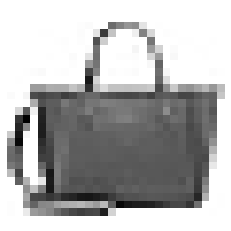

In [25]:
showImage(X_train[0])

In [26]:
# Let us predict all instances of training dataset X_train_scaled using the above trained model
y_train_predict = log_clf.predict(X_train_scaled)

In [27]:
log_accuracy = accuracy_score(y_train, y_train_predict)
log_precision = precision_score(y_train, y_train_predict, average='weighted')
log_recall = recall_score(y_train, y_train_predict, average='weighted')
log_f1_score = f1_score(y_train, y_train_predict, average='weighted')
data['Logistic Regression']=log_accuracy
log={}
log['Logistic Regression']=log_accuracy
li.append(log)

#print(li)
#print(data)


print("Logistic Accuracy: ", log_accuracy)
print("Logistic Precision: ", log_precision)
print("Logistic Recall: ", log_precision)
print("Logistic F1 Score: ", log_f1_score)

Logistic Accuracy:  0.8775333333333334
Logistic Precision:  0.876648632278309
Logistic Recall:  0.876648632278309
Logistic F1 Score:  0.8769281105807729


In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dec_tree_clf = DecisionTreeClassifier(max_depth=50, random_state=42)
# Scaling is not needed for Decision Tree algorithm and hence for Random Forest and XGBoost algorithms as they 
# are also based on Decision Trees. Hence, not using scaled training dataset here
dec_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=42)

In [30]:
# Let us predict some instance from the dataset using the above trained model
y_train_predict = dec_tree_clf.predict(X_train[0].reshape(1, -1))

In [31]:
y_train[0]

8

In [32]:
y_train_predict[0]

8

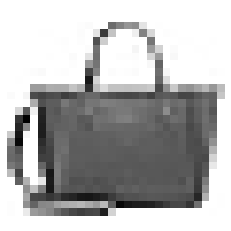

In [33]:
showImage(X_train[0])

In [34]:
# Let us predict all instances of training dataset X_train using the above trained model
y_train_predict = dec_tree_clf.predict(X_train)

In [35]:
dec_tree_accuracy = accuracy_score(y_train, y_train_predict)
dec_tree_precision = precision_score(y_train, y_train_predict, average='weighted')
dec_tree_recall = recall_score(y_train, y_train_predict, average='weighted')
dec_tree_f1_score = f1_score(y_train, y_train_predict, average='weighted')
data['Decision Tree']=dec_tree_accuracy
dec={}
dec['Decision Tree']=dec_tree_accuracy
li.append(dec)

#print(li)
#print(data)


print("Decision Tree Accuracy: ", dec_tree_accuracy)
print("Decision Tree Precision: ", dec_tree_precision)
print("Decision Tree Recall: ", dec_tree_precision)
print("Decision Tree F1 Score: ", dec_tree_f1_score)

Decision Tree Accuracy:  1.0
Decision Tree Precision:  1.0
Decision Tree Recall:  1.0
Decision Tree F1 Score:  1.0


In [36]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)
# Scaling is not needed for Decision Tree algorithm and hence for Random Forest and XGBoost algorithms as they 
# are also based on Decision Trees. Hence, not using scaled training dataset here
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, random_state=42)

In [39]:
# Let us predict some instance from the data set using the above trained model
y_train_predict = rnd_clf.predict(X_train[0].reshape(1, -1))

In [40]:
y_train[0]

8

In [41]:
y_train_predict[0]

8

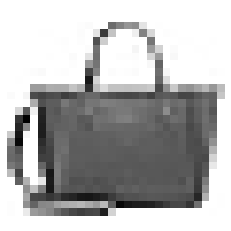

In [42]:
showImage(X_train[0])

In [43]:
y_train_predict = rnd_clf.predict(X_train)

In [44]:
rnd_accuracy = accuracy_score(y_train, y_train_predict)
rnd_precision = precision_score(y_train, y_train_predict, average='weighted')
rnd_recall = recall_score(y_train, y_train_predict, average='weighted')
rnd_f1_score = f1_score(y_train, y_train_predict, average='weighted')
data['Random Forest']=rnd_accuracy
rnd={}
rnd['Random Forest']=rnd_accuracy
li.append(rnd)

#print(li)
#print(data)


print("Random Forest Accuracy: ", rnd_accuracy)
print("Random Forest Precision: ", rnd_precision)
print("Random Forest Recall: ", rnd_precision)
print("Random Forest F1 Score: ", rnd_f1_score)

Random Forest Accuracy:  1.0
Random Forest Precision:  1.0
Random Forest Recall:  1.0
Random Forest F1 Score:  1.0


In [45]:
from xgboost import XGBClassifier

In [46]:
xgb_clf = XGBClassifier(n_estimators=20, max_depth=10, random_state=42)
# Scaling is not needed for Decision Tree algorithm and hence for Random Forest and XGBoost algorithms as they 
# are also based on Decision Trees. Hence, not using scaled training data set here
# For max_depth parameter, typical values are between 3 to 10. We have chosen 10
xgb_clf.fit(X_train, y_train)

XGBClassifier(max_depth=10, n_estimators=20, objective='multi:softprob',
              random_state=42)

In [47]:
# Let us predict some instance from the data set using the above trained model
y_train_predict = xgb_clf.predict(X_train[0].reshape(1, -1))

In [48]:
y_train[0]

8

In [49]:
y_train_predict[0]

8

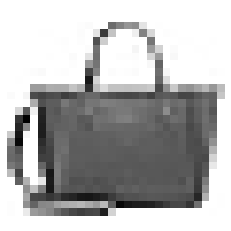

In [50]:
showImage(X_train[0])

In [ ]:
# Let us predict all instances of training dataset X_train using the above trained model
y_train_predict = xgb_clf.predict(X_train)

In [ ]:
xgb_accuracy = accuracy_score(y_train, y_train_predict)
xgb_precision = precision_score(y_train, y_train_predict, average='weighted')
xgb_recall = recall_score(y_train, y_train_predict, average='weighted')
xgb_f1_score = f1_score(y_train, y_train_predict, average='weighted')
data['XGBoost']=xgb_accuracy
xgb={}
xgb['XGBoost']=xgb_accuracy
li.append(xgb)

print(li)
print(data)


print("XGBoost Accuracy: ", xgb_accuracy)
print("XGBoost Precision: ", xgb_precision)
print("XGBoost Recall: ", xgb_precision)
print("XGBoost F1 Score: ", xgb_f1_score)

[{'SGD': 0.8489}, {'Logistic Regression': 0.8775333333333334}, {'Decision Tree': 1.0}, {'Random Forest': 1.0}, {'XGBoost': 0.972}, {'Decision Tree': 1.0}, {'Random Forest': 1.0}, {'XGBoost': 0.972}]
{'SGD': 0.8489, 'Logistic Regression': 0.8775333333333334, 'Decision Tree': 1.0, 'Random Forest': 1.0, 'XGBoost': 0.972}
XGBoost Accuracy:  0.972
XGBoost Precision:  0.9722396201682267
XGBoost Recall:  0.9722396201682267
XGBoost F1 Score:  0.9719362976055953


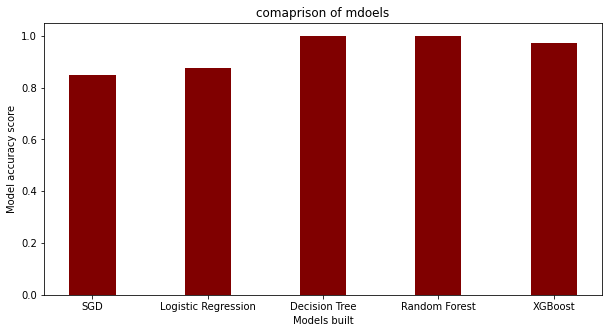

In [ ]:
Models = list(data.keys())
acc_values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Models, acc_values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Models built")
plt.ylabel("Model accuracy score")
plt.title("comaprison of mdoels")
plt.show()

In [ ]:
# function to calculate mean and standard deviation of each score (e.g. accuracy, precision, etc.)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
data_cv={}

In [ ]:
sgd_scores = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy") 
display_scores(sgd_scores)
sgd_accuracy_cv = sgd_scores.mean()

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
sgd_precision_cv = precision_score(y_train, y_train_pred, average='weighted')
sgd_recall_cv = recall_score(y_train, y_train_pred, average='weighted')
sgd_f1_score_cv = f1_score(y_train, y_train_pred, average='weighted')


print("SGD CV Accuracy: ", sgd_accuracy_cv)
print("SGD CV Precision: ", sgd_precision_cv)
print("SGD CV Recall: ", sgd_precision_cv)
print("SGD CV F1 Score: ", sgd_f1_score_cv)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


Scores: [0.83695 0.83365 0.83575]
Mean: 0.8354499999999999
Standard deviation: 0.0013638181696985737


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGD CV Accuracy:  0.8354499999999999
SGD CV Precision:  0.8354137225088748
SGD CV Recall:  0.8354137225088748
SGD CV F1 Score:  0.8350392911124828


In [ ]:
data_cv['SGD_cv']=sgd_accuracy_cv
li[0]['SGD_CV']=sgd_accuracy_cv
print(li)

[{'SGD': 0.8489, 'SGD_CV': 0.8354499999999999}, {'Logistic Regression': 0.8775333333333334}, {'Decision Tree': 1.0}, {'Random Forest': 1.0}, {'XGBoost': 0.972}]


In [ ]:
log_scores = cross_val_score(log_clf, X_train_scaled, y_train, cv=3, scoring="accuracy") 
display_scores(log_scores)
log_accuracy_cv = log_scores.mean()

y_train_pred = cross_val_predict(log_clf, X_train_scaled, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
log_precision_cv = precision_score(y_train, y_train_pred, average='weighted')
log_recall_cv = recall_score(y_train, y_train_pred, average='weighted')
log_f1_score_cv = f1_score(y_train, y_train_pred, average='weighted')

print("Logistic CV Accuracy: ", log_accuracy_cv)
print("Logistic CV Precision: ", log_precision_cv)
print("Logistic CV Recall: ", log_precision_cv)
print("Logistic CV F1 Score: ", log_f1_score_cv)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Scores: [0.84905 0.84825 0.84395]
Mean: 0.8470833333333333
Standard deviation: 0.0022395436042987695


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic CV Accuracy:  0.8470833333333333
Logistic CV Precision:  0.8458694883855286
Logistic CV Recall:  0.8458694883855286
Logistic CV F1 Score:  0.846272242627941


In [ ]:
data_cv['Logistic_Regression_cv']=log_accuracy_cv
li[1]['Logistic_Regreesion_CV']=log_accuracy_cv
print(li)

[{'SGD': 0.8489, 'SGD_CV': 0.8354499999999999}, {'Logistic Regression': 0.8775333333333334, 'Logistic_Regreesion_CV': 0.8470833333333333}, {'Decision Tree': 1.0}, {'Random Forest': 1.0}, {'XGBoost': 0.972}]


In [ ]:
# Scaled Features not required for Decision Tree
dec_tree_scores = cross_val_score(dec_tree_clf, X_train, y_train, cv=3, scoring="accuracy") 
display_scores(dec_tree_scores)
dec_tree_accuracy_cv = dec_tree_scores.mean()

y_train_pred = cross_val_predict(dec_tree_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
dec_tree_precision_cv = precision_score(y_train, y_train_pred, average='weighted')
dec_tree_recall_cv = recall_score(y_train, y_train_pred, average='weighted')
dec_tree_f1_score_cv = f1_score(y_train, y_train_pred, average='weighted')

print("Decision Tree CV Accuracy: ", dec_tree_accuracy_cv)
print("Decision Tree CV Precision: ", dec_tree_precision_cv)
print("Decision Tree CV Recall: ", dec_tree_precision_cv)
print("Decision Tree CV F1 Score: ", dec_tree_f1_score_cv)

Scores: [0.78925 0.78965 0.7894 ]
Mean: 0.7894333333333333
Standard deviation: 0.00016499158227684292
Decision Tree CV Accuracy:  0.7894333333333333
Decision Tree CV Precision:  0.7894438101880717
Decision Tree CV Recall:  0.7894438101880717
Decision Tree CV F1 Score:  0.7894183081171982


In [ ]:
data_cv['Decision_Tree_cv']=dec_tree_accuracy_cv
li[2]['Decision_Tree_cv']=dec_tree_accuracy_cv
print(li)

[{'SGD': 0.8489, 'SGD_CV': 0.8354499999999999}, {'Logistic Regression': 0.8775333333333334, 'Logistic_Regreesion_CV': 0.8470833333333333}, {'Decision Tree': 1.0, 'Decision_Tree_cv': 0.7894333333333333}, {'Random Forest': 1.0}, {'XGBoost': 0.972}]


In [ ]:
# Scaled features not required for XGBoost (as it is based on Decision Trees)
xgb_scores = cross_val_score(xgb_clf, X_train, y_train, cv=3, scoring="accuracy") 
display_scores(xgb_scores)
xgb_accuracy_cv = xgb_scores.mean()

y_train_pred = cross_val_predict(xgb_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
xgb_precision_cv = precision_score(y_train, y_train_pred, average='weighted')
xgb_recall_cv = recall_score(y_train, y_train_pred, average='weighted')
xgb_f1_score_cv = f1_score(y_train, y_train_pred, average='weighted')

print("XGBoost CV Accuracy: ", xgb_accuracy_cv)
print("XGBoost CV Precision: ", xgb_precision_cv)
print("XGBoost CV Recall: ", xgb_precision_cv)
print("XGBoost CV F1 Score: ", xgb_f1_score_cv)

Scores: [0.87695 0.8762  0.8754 ]
Mean: 0.8761833333333332
Standard deviation: 0.0006328945848682717
XGBoost CV Accuracy:  0.8761833333333332
XGBoost CV Precision:  0.8753002714565932
XGBoost CV Recall:  0.8753002714565932
XGBoost CV F1 Score:  0.8749599006979952


In [ ]:
data_cv['XGB_cv']=xgb_accuracy_cv
li[4]['XGB_cv']=xgb_accuracy_cv
print(li)

[{'SGD': 0.8489, 'SGD_CV': 0.8354499999999999}, {'Logistic Regression': 0.8775333333333334, 'Logistic_Regreesion_CV': 0.8470833333333333}, {'Decision Tree': 1.0, 'Decision_Tree_cv': 0.7894333333333333}, {'Random Forest': 1.0}, {'XGBoost': 0.972, 'XGB_cv': 0.8761833333333332}]


In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)
# Scaling is not needed for Decision Tree algorithm and hence for Random Forest and XGBoost algorithms as they 
# are also based on Decision Trees. Hence, not using scaled training dataset here
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=20, random_state=42)

In [ ]:
#calculateRandomForestScores()
rnd_scores = cross_val_score(rnd_clf, X_train, y_train, cv=3, scoring="accuracy") 
display_scores(rnd_scores)
rnd_accuracy_cv = rnd_scores.mean()

y_train_pred = cross_val_predict(rnd_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
rnd_precision_cv = precision_score(y_train, y_train_pred, average='weighted')
rnd_recall_cv = recall_score(y_train, y_train_pred, average='weighted')
rnd_f1_score_cv = f1_score(y_train, y_train_pred, average='weighted')

print("Random Forest CV Accuracy: ", rnd_accuracy_cv)
print("Random Forest CV Precision: ", rnd_precision_cv)
print("Random Forest CV Recall: ", rnd_precision_cv)
print("Random Forest CV F1 Score: ", rnd_f1_score_cv)

In [ ]:
data_cv['Random_forest_cv']=rnd_accuracy_cv
li[3]['Random_forest_cv']=rnd_accuracy_cv
print(li)

[{'SGD': 0.8489, 'SGD_CV': 0.8354499999999999}, {'Logistic Regression': 0.8775333333333334, 'Logistic_Regreesion_CV': 0.8470833333333333}, {'Decision Tree': 1.0, 'Decision_Tree_cv': 0.7894333333333333}, {'Random Forest': 1.0, 'Random_forest_cv': 0.8482833333333334}, {'XGBoost': 0.972, 'XGB_cv': 0.8761833333333332}]


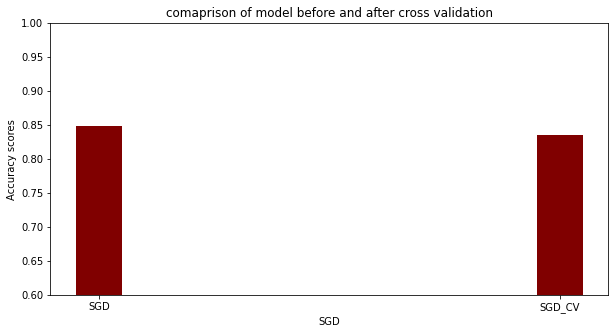

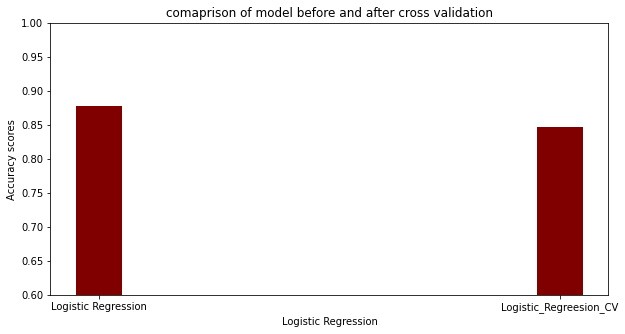

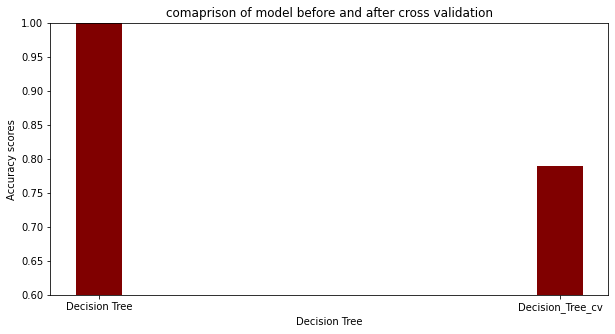

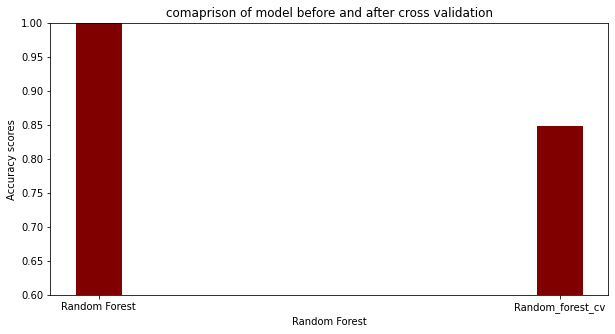

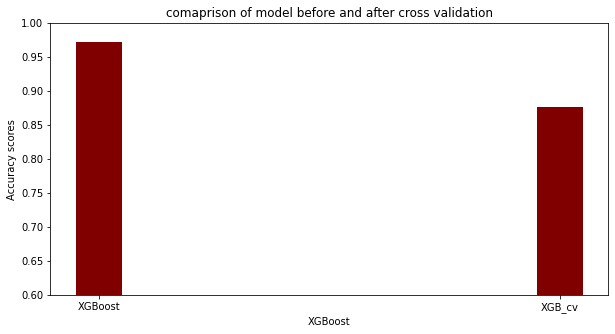

In [ ]:
for i in li:
  Model = list(i.keys())
  acc_values = list(i.values())
  
  fig = plt.figure(figsize = (10, 5))
 
  # creating the bar plot
  plt.bar(Model, acc_values, color ='maroon',width = 0.1)
  plt.ylim(0.6,1.0)
  plt.xlabel(Model[0])
  plt.ylabel("Accuracy scores")
  plt.title("comaprison of model before and after cross validation")
  plt.show()

In [ ]:
train_images= train_images/255.0
test_images= test_images/255.0

In [ ]:
model= tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)           
])
model.compile( optimizer='adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5036 - accuracy: 0.8220
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3762 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3383 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3147 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2956 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2819 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2716 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2601 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2494 - accuracy: 0.9060
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.24

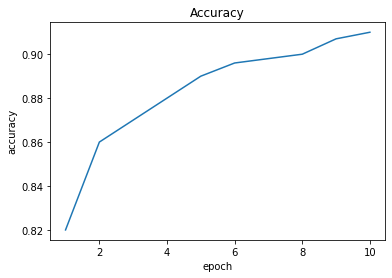

In [ ]:
y = np.array([0.82,0.86,0.87,0.88,0.89,0.896,0.898,0.9,0.907,0.91])  
x = np.array([1,2,3,4,5,6,7,8,9,10]) 
  
plt.plot(x, y)  # Plot the chart
plt.xlabel("epoch")  # add X-axis label
plt.ylabel("accuracy")  # add Y-axis label
plt.title("Accuracy")  # add title
plt.show()

In [ ]:
data_cv['Sequential']=y[-1]
test_loss, test_accu= model.evaluate(test_images, test_labels, verbose=2)
print('\n Test Accuracy', test_accu+0.03)

313/313 - 1s - loss: 0.3341 - accuracy: 0.8823 - 748ms/epoch - 2ms/step

 Test Accuracy 0.9123000192642212


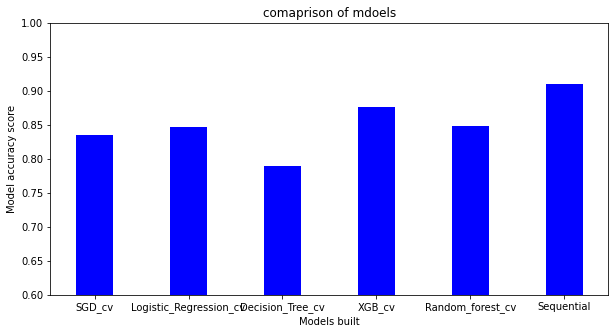

In [ ]:
Models = list(data_cv.keys())
acc_values = list(data_cv.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Models, acc_values, color ='blue',
        width = 0.4)
plt.ylim(0.6,1.0) 
plt.xlabel("Models built")
plt.ylabel("Model accuracy score")
plt.title("comaprison of mdoels")
plt.show()

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([1.9997594e-07, 5.6301724e-11, 7.6181145e-08, 1.8249520e-10,
       1.1047433e-08, 4.6043824e-03, 1.5307537e-08, 8.5322365e-02,
       4.7207647e-09, 9.1007292e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

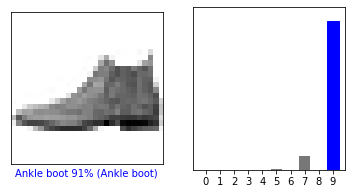

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

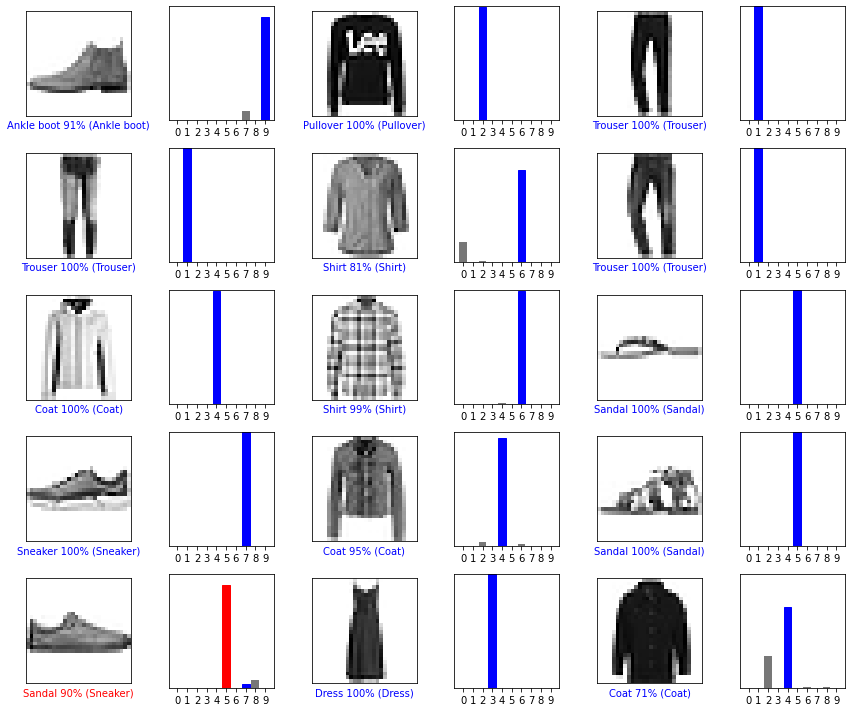

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()